In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd

In [2]:
(X_train,y_train),(X_test,y_test) = keras.datasets.mnist.load_data()

In [3]:
len(X_train)

60000

In [4]:
len(X_test)

10000

In [5]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

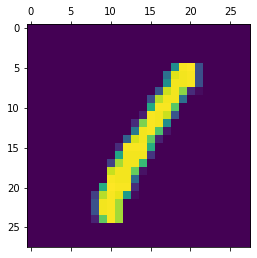

In [6]:
plt.matshow(X_train[3])

In [7]:
y_train[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [8]:
X_train.shape

(60000, 28, 28)

In [9]:
X_train = X_train / 255
X_test = X_test /255

In [10]:
X_train_flatten = X_train.reshape(len(X_train),28*28)
X_test_flatten = X_test.reshape(len(X_test),28*28)

In [11]:
X_train_flatten.shape

(60000, 784)

In [12]:
X_test_flatten.shape

(10000, 784)

In [13]:
X_train_flatten[2]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [14]:
model = keras.Sequential([
    keras.layers.Dense(10,input_shape=(784,),activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(X_train_flatten,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 1s 647us/step - loss: 0.4694 - accuracy: 0.8768
Epoch 2/5
1875/1875 [==============================] - 1s 605us/step - loss: 0.3035 - accuracy: 0.9150
Epoch 3/5
1875/1875 [==============================] - 1s 601us/step - loss: 0.2833 - accuracy: 0.9206
Epoch 4/5
1875/1875 [==============================] - 1s 598us/step - loss: 0.2731 - accuracy: 0.9238
Epoch 5/5
1875/1875 [==============================] - 1s 603us/step - loss: 0.2665 - accuracy: 0.9251


In [15]:
model.evaluate(X_test_flatten,y_test)

313/313 [==============================] - 0s 555us/step - loss: 0.2688 - accuracy: 0.9251


[0.2688315212726593, 0.9251000285148621]

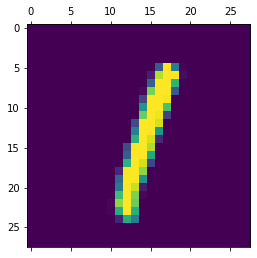

In [16]:
plt.matshow(X_test[5])

In [17]:
y_test[5]

1

313/313 [==============================] - 0s 477us/step


Text(69.0, 0.5, 'Truth')

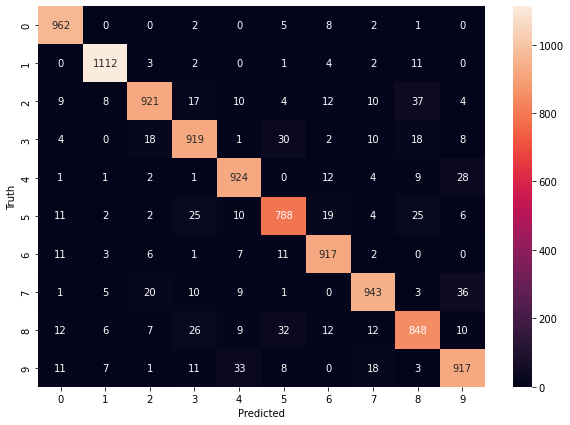

In [18]:
y_pred = model.predict(X_test_flatten)
y_predicted_labels = [np.argmax(i) for i in y_pred]
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [19]:
model = keras.Sequential([
    keras.layers.Dense(100,input_shape=(784,),activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(X_train_flatten,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 2s 771us/step - loss: 0.2760 - accuracy: 0.9217
Epoch 2/5
1875/1875 [==============================] - 1s 773us/step - loss: 0.1235 - accuracy: 0.9636
Epoch 3/5
1875/1875 [==============================] - 1s 789us/step - loss: 0.0853 - accuracy: 0.9741
Epoch 4/5
1875/1875 [==============================] - 2s 800us/step - loss: 0.0646 - accuracy: 0.9804
Epoch 5/5
1875/1875 [==============================] - 2s 838us/step - loss: 0.0510 - accuracy: 0.9841


In [20]:
model.evaluate(X_test_flatten,y_test)

313/313 [==============================] - 0s 661us/step - loss: 0.0804 - accuracy: 0.9758


[0.08041910082101822, 0.9757999777793884]

313/313 [==============================] - 0s 539us/step


Text(69.0, 0.5, 'Truth')

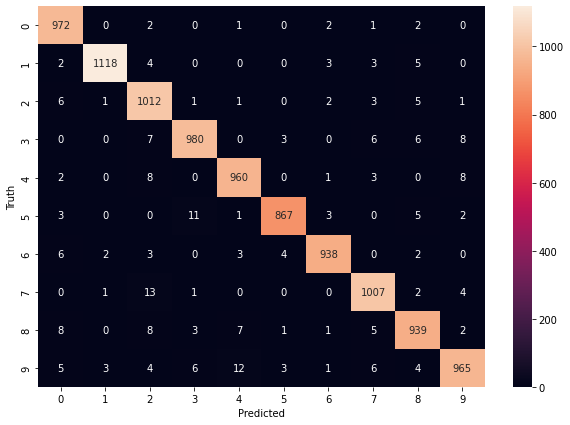

In [21]:
y_pred = model.predict(X_test_flatten)
y_predicted_labels = [np.argmax(i) for i in y_pred]
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [34]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(100,activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
])

tb_callback = tf.keras.callbacks.TensorBoard(log_dir='logs/adam',histogram_freq=1)

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(X_train,y_train,epochs=5,callbacks=[tb_callback])

Epoch 1/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2757 - accuracy: 0.9224
Epoch 2/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1276 - accuracy: 0.9624
Epoch 3/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0890 - accuracy: 0.9737
Epoch 4/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0691 - accuracy: 0.9795
Epoch 5/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0543 - accuracy: 0.9832


In [35]:
# %load_ext tensorboard
# %tensorboard --logdir logs/adam


The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


'kill' is not recognized as an internal or external command,
operable program or batch file.
